## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [122]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("data/kc_house_data.csv", index_col=0)

In [2]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.shape

(21597, 20)

In [4]:
# waterfront, view, yr_renovated contain NaN's
# change date to date format
# change sqft_basement to float
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [89]:
# change date to date format
data['date']= pd.to_datetime(data['date'])

# convert sqft_basement to int64 and dropped '?'
data["sqft_basement"] = data["sqft_basement"].replace({'?':np.nan}).astype(float)

In [90]:
# changed Nan's to 0 for waterfront column
data['waterfront'] = data['waterfront'].fillna(0)
data['waterfront'].value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [91]:
# changed Nan's to 0 for yr_renovated column
data['yr_renovated'] = data['yr_renovated'].fillna(0)
data['yr_renovated'].value_counts(dropna=False)

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [92]:
# changed Nan's to 0 for view column
data['view'] = data['view'].fillna(0)
data['view'].value_counts(dropna=False)

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [93]:
X = data.drop("price", axis=1)
y = data["price"]

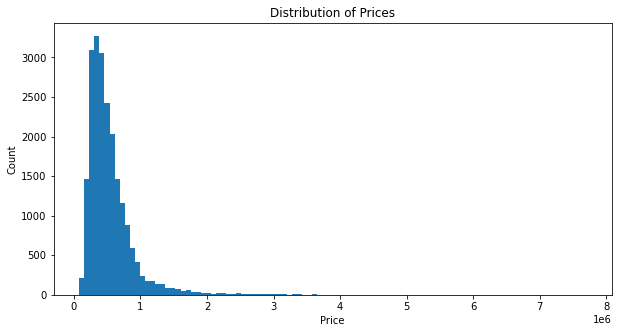

In [94]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y, bins=100)

ax.set_xlabel("Price")
ax.set_ylabel("Count")
ax.set_title("Distribution of Prices");

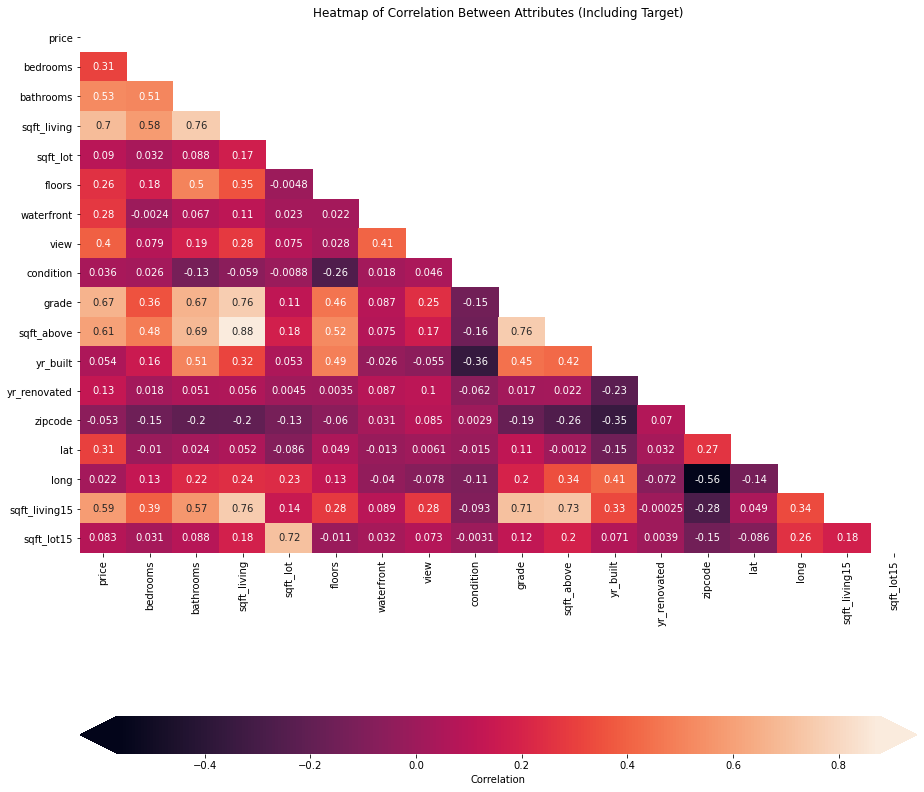

In [67]:
# heatmap

heatmap_data = pd.concat([y, X], axis=1)
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(15, 15))


sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [82]:
first_correlated_feature = 'sqft_living'
second_correlated_feature = 'grade'
third_correlated_feature = 'sqft_above'

Train score:      0.4877465936487044
Validation score: 0.5024006604207555


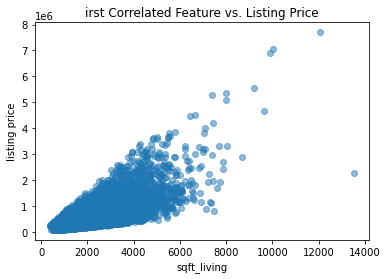

In [135]:
fig, ax = plt.subplots()

ax.scatter(X[first_correlated_feature], y, alpha=0.5)
ax.set_xlabel(first_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("irst Correlated Feature vs. Listing Price")

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X[[first_correlated_feature]],
    y=y,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4415276917800676
Validation score: 0.4576291513295345


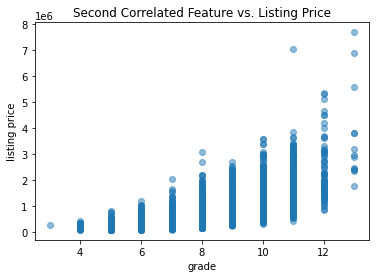

In [136]:
fig, ax = plt.subplots()

ax.scatter(X[second_correlated_feature], y, alpha=0.5)
ax.set_xlabel(second_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Second Correlated Feature vs. Listing Price")

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X[[second_correlated_feature]],
    y=y,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean());

Train score:      0.3617488878791811
Validation score: 0.3759975506772526


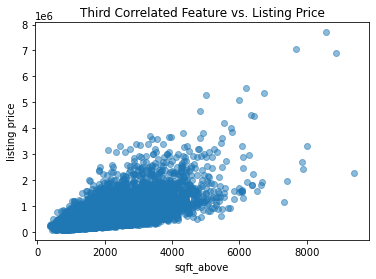

In [138]:
fig, ax = plt.subplots()

ax.scatter(X[third_correlated_feature], y, alpha=0.5)
ax.set_xlabel(third_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Third Correlated Feature vs. Listing Price")

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X[[third_correlated_feature]],
    y=y,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean());

In [84]:
# baseline time
baseline_model = LinearRegression()

In [86]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X[[first_correlated_feature]],
    y=y,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4877465936487044
Validation score: 0.5024006604207555


In [ ]:
# r_squared scores --> meh

In [95]:
# confirm columns are numeric
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  float64       
 8   view           21597 non-null  float64       
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21143 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  float64       
 15  zipco

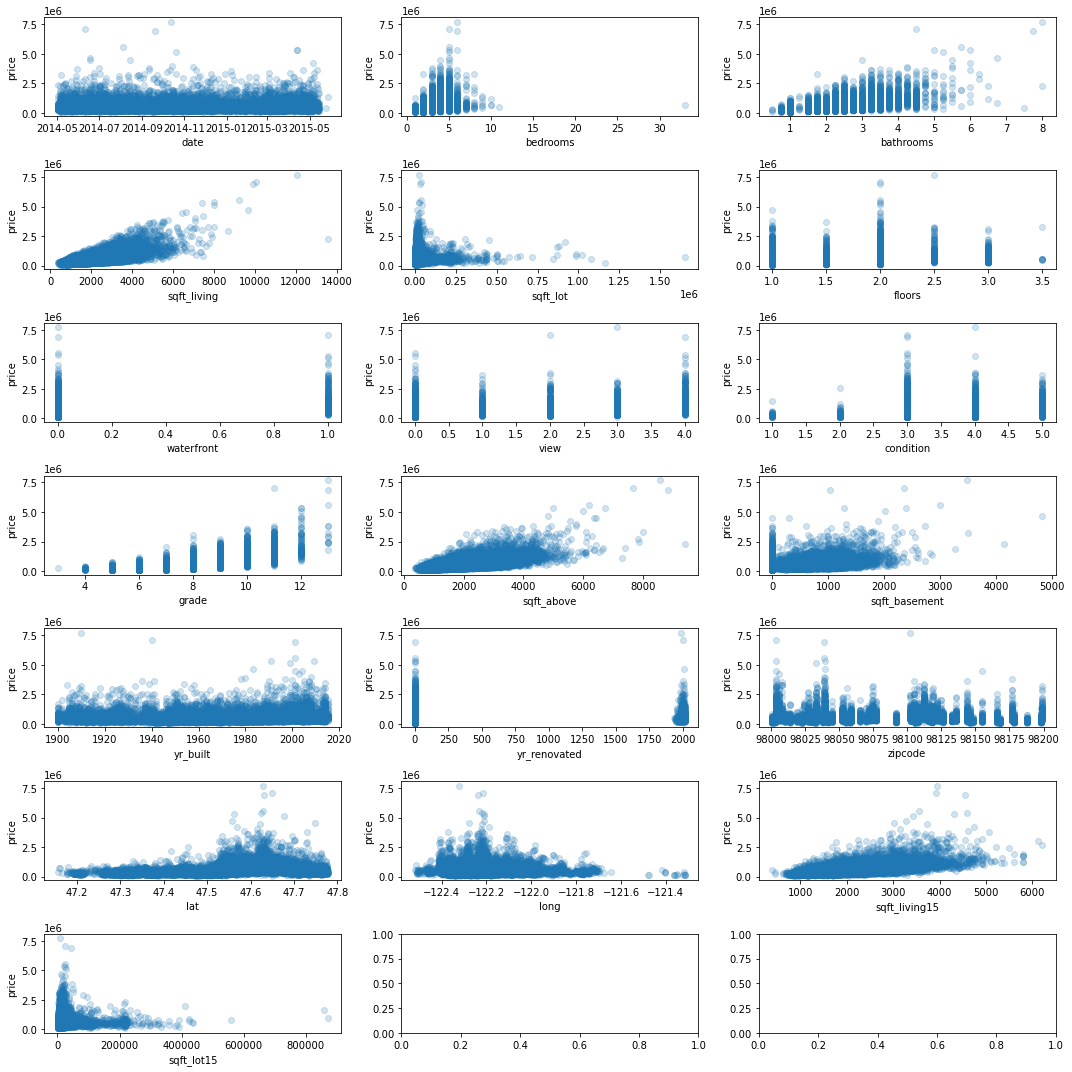

In [118]:
scatterplot_data = X

fig, axes = plt.subplots(ncols=3, nrows=7, figsize=(15, 15))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X[col], y, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")



In [133]:

X_second = X[["sqft_living", "grade", "sqft_above"]].copy()
X_third = X[["bathrooms", "sqft_living", "grade", "sqft_above", "sqft_living15"]].copy()


In [121]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_second,
    y=y,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5366924916358354
Validation score: 0.5513473845428744

Baseline Model
Train score:      0.4877465936487044
Validation score: 0.5024006604207555


In [134]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_third,
    y=y,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5403843785278233
Validation score: 0.5529379724023592

Baseline Model
Train score:      0.4877465936487044
Validation score: 0.5024006604207555


In [123]:

sm.OLS(y, sm.add_constant(X_second)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     8494.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:14:14   Log-Likelihood:            -2.9897e+05
No. Observations:               21597   AIC:                         5.980e+05
Df Residuals:                   21593   BIC:                         5.980e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.564e+05   1.36e+04    -48.298      0.000   -6.83e+05    -6.3e+05
sqft_living   234.5900      4.039     58.075      0.000     226.672     242.508
grade        1.108e+05   2325.608     47.637      0.000    1.06e+05    1.15e+05
sqft_above    -78.0959      4.427    -17.642      0.000     -86.773     -69.419
==============================================================================
Omnibus:                    17102.886   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1062513.676
Skew:                           3.332   Prob(JB):                         0.00
Kurtosis:                      36.709   Cond. No.                     2.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_second)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_second.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living: True
grade: True
sqft_above: True
